## Configuración de ambiente de trabajo

```bash
pip install --upgrade pip
```

```bash
pip install pyjanitor matplotlib==3.5.1 missingno numpy pandas pyreadr seaborn session-info upsetplot==0.6.1
```

or 

```bash
pip install -r requirements.txt
```

### Importar librerías

In [69]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot
from fs import open_fs
from pathlib import Path
import shutil # Necesario para la operación de movimiento de archivos
import sys
import warnings
# Puedes ser más específico con el tipo de advertencia si lo conoces, por ejemplo:
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)

# Para las advertencias relacionadas con pkg_resources (como las de tu captura):
warnings.filterwarnings("ignore", message="pkg_resources is deprecated as an API")
warnings.filterwarnings("ignore", message="Deprecated call to pkg_resources.declare_namespace")

from pathlib import Path

# This code snippet is used to import a custom Python module named 'pandas_missing_extension.py'
# located in the parent directory of the current notebook.
# 1. Get the path of the current notebook (where live-exploration-missing-values.ipynb is)
#    This will give you something like:
#    /home/paco/datos_faltantes/curso-datos-faltantes-main/jupyter/live-exploration-missing-values.ipynb
current_notebook_path = Path.cwd() # Path.cwd() returns the current working directory of the kernel

# 2. Navigate up one level to find the directory containing 'pandas_missing_extension.py'
#    This will give you:
#    /home/paco/datos_faltantes/curso-datos-faltantes-main/
project_root_dir = current_notebook_path.parent

# 3. Add this directory to Python's system path if it's not already there
#    This allows Python to find modules in this directory.
if str(project_root_dir) not in sys.path:
    sys.path.append(str(project_root_dir))
    print(f"Added {project_root_dir} to sys.path")

# 4. Now, import your custom accessor module
#    Python will now find 'pandas_missing_extension.py' in the added path.
# import pandas_missing_extension
import pandas_missing_extension as pmx, importlib, inspect
importlib.reload(pmx)



<module 'pandas_missing_extension' from '/home/fcisnerosr/github/datos_faltantes/curso-datos-faltantes-main/pandas_missing_extension.py'>

### Configurar el aspecto general de las gráficas del proyecto

In [3]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

### Operar con valores faltantes

##### Python

In [4]:
print(None or True,
      None or True,
      None == None,
      None is None,
      type(None),
      sep='\n')      

True
True
True
True
<class 'NoneType'>


#### NumPy

In [5]:
# print(
#     np.nan  or True,
#     np.nan is np.nan,
#     np.nan == np.nan,
#     np.nan / 2,
#     type(np.nan),
#     np.isnan(np.nan),
#     sep='\n'    
# )

#### Pandas

In [6]:
# test_missing_df = pd.DataFrame.from_dict(
#     data=dict(
#         x=[0, 1, np.nan, np.nan, None],
#         y=[0, 1, pd.NA, np.nan, None]
#     )
# )
# print(test_missing_df)

In [7]:
# test_missing_df.isna()

In [8]:
# test_missing_df.isnull()

In [9]:
# test_missing_df.x.isnull()

In [10]:
# pd.Series([1, np.nan])

In [11]:
# pd.Series([pd.to_datetime('2022-01-01'), np.nan])

In [12]:
# pd.Series([-1]).isnull()

### Cargar los conjuntos de datos

In [13]:
# 1️⃣ Crear la carpeta .kaggle en tu home (usuario local)
import os
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# 2️⃣ Descargar el dataset
!kaggle datasets download -d kumargh/pimaindiansdiabetescsv

# 3️⃣ Descomprimir
!yes | unzip -o pimaindiansdiabetescsv.zip -d pima_diabetes



Dataset URL: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv
License(s): CC0-1.0
pimaindiansdiabetescsv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  pimaindiansdiabetescsv.zip
  inflating: pima_diabetes/pima-indians-diabetes.csv  
yes: standard output: Broken pipe


In [14]:
# --- PARTE 1: UBICAR Y MOVER EL ARCHIVO ---

# 1. Obtener la ruta del directorio donde se está ejecutando este Notebook.
# Esto te dará algo como: Path('/home/paco/datos_faltantes/curso-datos-faltantes-main/jupyter')
current_notebook_dir = Path.cwd()
print(f"Directorio actual del Notebook: {current_notebook_dir}")

# 2. Construir la ruta al archivo de ORIGEN (donde está el CSV después de descomprimir).
# Es 'pima_diabetes/pima-indians-diabetes.csv' RELATIVO al directorio del Notebook.
source_file_path = current_notebook_dir / 'pima_diabetes' / 'pima-indians-diabetes.csv'
print(f"Ruta de origen esperada: {source_file_path}")

# 3. Construir la ruta al directorio de DESTINO ('data/').
# El directorio 'data' está UN NIVEL ARRIBA del directorio del Notebook (jupyter/)
# y luego se entra en 'data/'.
# current_notebook_dir.parent te lleva a 'curso-datos-faltantes-main/'.
# Luego, le añades 'data'.
destination_dir = current_notebook_dir.parent / 'data'
print(f"Directorio de destino esperado: {destination_dir}")

# 4. Construir la ruta COMPLETA del archivo en su destino.
destination_file_path = destination_dir / 'pima-indians-diabetes.csv'
print(f"Ruta de destino final: {destination_file_path}")

# 5. Mover el archivo SÓLO SI EXISTE en el origen.
if source_file_path.exists():
    # shutil.move es como el comando 'mv' de Linux o 'move' de Windows.
    # Mueve el archivo de source_file_path a destination_file_path.
    shutil.move(source_file_path, destination_file_path)
    print(f"\n¡Éxito! Archivo '{source_file_path.name}' movido a '{destination_file_path}'.")
else:
    print(f"\nError: El archivo de origen '{source_file_path}' no fue encontrado.")
    print("Asegúrate de que el archivo 'pimaindiansdiabetescsv.zip' se haya descargado y descomprimido correctamente en 'jupyter/pima_diabetes/'.")

# --- PARTE 2: CARGAR EL ARCHIVO CON PANDAS DESDE LA NUEVA UBICACIÓN ---

# Ahora que el archivo está en 'data/', la ruta para Pandas debe reflejar eso.
# Desde 'jupyter/', para llegar a 'data/', subimos un nivel ('../') y entramos en 'data/'.
final_csv_load_path_for_pandas = '../data/pima-indians-diabetes.csv'

try:
    diabetes_df = pd.read_csv(
    final_csv_load_path_for_pandas,
    sep=",",
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ]
    )
    print(diabetes_df.head())
    
except FileNotFoundError:
    print(f"\nError: No se pudo cargar el archivo CSV desde '{final_csv_load_path_for_pandas}'.")
    print("Verifica que el archivo haya sido movido correctamente y que la ruta sea correcta.")

Directorio actual del Notebook: /home/fcisnerosr/github/datos_faltantes/curso-datos-faltantes-main/jupyter
Ruta de origen esperada: /home/fcisnerosr/github/datos_faltantes/curso-datos-faltantes-main/jupyter/pima_diabetes/pima-indians-diabetes.csv
Directorio de destino esperado: /home/fcisnerosr/github/datos_faltantes/curso-datos-faltantes-main/data
Ruta de destino final: /home/fcisnerosr/github/datos_faltantes/curso-datos-faltantes-main/data/pima-indians-diabetes.csv

¡Éxito! Archivo 'pima-indians-diabetes.csv' movido a '/home/fcisnerosr/github/datos_faltantes/curso-datos-faltantes-main/data/pima-indians-diabetes.csv'.
   pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4  

### Pima Indians Diabetes

### naniar (oceanbuoys, pedestrian, riskfactors)

#### Crear unidades de información de los conjuntos de datos y descargar y cargar los conjuntos de datos

In [15]:
# --- Configuración (ajusta si es necesario) ---
# Obtener el directorio padre de tu notebook (curso-datos-faltantes-main/)
# Esto es esencial para ubicar la carpeta 'data' de forma robusta.
project_root_dir = Path.cwd().parent
data_dir = project_root_dir / 'data' # La ruta completa a tu directorio 'data'

# Nombres de los datasets (sin extensión .rda)
# Asegúrate de que estos nombres coincidan con los nombres de los objetos R dentro de los archivos .rda
datasets_names = ["oceanbuoys", "pedestrian", "riskfactors"]
extension = ".rda"

# Diccionario para almacenar los DataFrames
datasets_dfs = {}

# --- Lectura y Conversión ---

print(f"Buscando archivos .rda en: {data_dir}\n")

for dataset_name in datasets_names:
    # Construir la ruta completa del archivo .rda
    dataset_file_path = data_dir / f"{dataset_name}{extension}"

    if dataset_file_path.exists():
        print(f"Leyendo '{dataset_file_path.name}'...")
        try:
            # Leer el archivo .rda
            # .get(dataset_name) intenta extraer un objeto llamado 'dataset_name' del archivo .rda
            df = pyreadr.read_r(str(dataset_file_path)).get(dataset_name)
            datasets_dfs[f"{dataset_name}_df"] = df
            print(f"  -> '{dataset_name}_df' creado con éxito.")
        except Exception as e:
            print(f"  Error al leer '{dataset_file_path.name}' con pyreadr: {e}")
            print(f"  Asegúrate de que el nombre del objeto R dentro del archivo .rda sea '{dataset_name}'.")
            print("  Si el nombre del objeto R es diferente al nombre del archivo, necesitarás ajustar .get().")
    else:
        print(f"Advertencia: Archivo '{dataset_file_path.name}' no encontrado en '{data_dir}'. Saltando.")

# --- Verificación ---
print("\n--- DataFrames cargados ---")
if datasets_dfs:
    for df_name, df in datasets_dfs.items():
        print(f"\nDataFrame: {df_name}")
        print(df.head())
        print(f"Forma: {df.shape}")
else:
    print("No se cargaron DataFrames.")


Buscando archivos .rda en: /home/fcisnerosr/github/datos_faltantes/curso-datos-faltantes-main/data

Leyendo 'oceanbuoys.rda'...
  -> 'oceanbuoys_df' creado con éxito.
Leyendo 'pedestrian.rda'...
  -> 'pedestrian_df' creado con éxito.
Leyendo 'riskfactors.rda'...
  -> 'riskfactors_df' creado con éxito.

--- DataFrames cargados ---

DataFrame: oceanbuoys_df
     year  latitude  longitude  sea_temp_c  air_temp_c   humidity  wind_ew  \
0  1997.0       0.0     -110.0   27.590000       27.15  79.599998     -6.4   
1  1997.0       0.0     -110.0   27.549999       27.02  75.800003     -5.3   
2  1997.0       0.0     -110.0   27.570000       27.00  76.500000     -5.1   
3  1997.0       0.0     -110.0   27.620001       26.93  76.199997     -4.9   
4  1997.0       0.0     -110.0   27.650000       26.84  76.400002     -3.5   

   wind_ns  
0      5.4  
1      5.3  
2      4.5  
3      2.5  
4      4.1  
Forma: (736, 8)

DataFrame: pedestrian_df
  hourly_counts           date_time  year    month  m

#### Incluir conjuntos de datos en nuestro ambiente local

In [16]:
# --- Mover DataFrames del Diccionario al Ámbito Global y Limpiar ---

print("\n--- Convirtiendo DataFrames de diccionario a variables globales ---")
if datasets_dfs:
    # Esta línea es la clave: extrae cada par clave-valor del diccionario
    # y los establece como variables independientes en tu entorno de Jupyter.
    locals().update(**datasets_dfs)
    print("DataFrames movidos al ámbito global (ej. 'oceanbuoys_df').")

    # Una vez que los DataFrames están como variables globales,
    # el diccionario datasets_dfs ya no es necesario y se puede eliminar para liberar memoria.
    del datasets_dfs
    print("Diccionario 'datasets_dfs' eliminado.")
else:
    print("No hay DataFrames cargados para mover.")

# --- Verificación de Variables Globales ---

print("\n--- Verificación de acceso a DataFrames como variables globales ---")
# Ahora puedes acceder a los DataFrames directamente por sus nombres
# Por ejemplo:
try:
    if 'oceanbuoys_df' in locals():
        print("Variable 'oceanbuys_df' existe.")
        print(oceanbuoys_df.head())
        print(f"Forma de 'oceanbuoys_df': {oceanbuoys_df.shape}")
    else:
        print("La variable 'oceanbuoys_df' no se pudo crear (verifica nombres de archivos/objetos R).")

    if 'pedestrian_df' in locals():
        print("Variable 'pedestrian_df' existe.")
        print(pedestrian_df.head())
        print(f"Forma de 'pedestrian_df': {pedestrian_df.shape}")

    if 'oceanbuoys_df' in locals():
        print("Variable 'oceanbuoys_df' existe.")
        print(oceanbuoys_df.head())
        print(f"Forma de 'oceanbuoys_df': {oceanbuoys_df.shape}")

except NameError as e:
    print(f"\nError al intentar acceder a una variable global: {e}")
    print("Esto puede ocurrir si el nombre del objeto R dentro del archivo .rda no coincide con el 'dataset_name' utilizado en la lista.")
except Exception as e:
    print(f"\nOcurrió un error inesperado durante la verificación: {e}")


--- Convirtiendo DataFrames de diccionario a variables globales ---
DataFrames movidos al ámbito global (ej. 'oceanbuoys_df').
Diccionario 'datasets_dfs' eliminado.

--- Verificación de acceso a DataFrames como variables globales ---
Variable 'oceanbuys_df' existe.
     year  latitude  longitude  sea_temp_c  air_temp_c   humidity  wind_ew  \
0  1997.0       0.0     -110.0   27.590000       27.15  79.599998     -6.4   
1  1997.0       0.0     -110.0   27.549999       27.02  75.800003     -5.3   
2  1997.0       0.0     -110.0   27.570000       27.00  76.500000     -5.1   
3  1997.0       0.0     -110.0   27.620001       26.93  76.199997     -4.9   
4  1997.0       0.0     -110.0   27.650000       26.84  76.400002     -3.5   

   wind_ns  
0      5.4  
1      5.3  
2      4.5  
3      2.5  
4      4.1  
Forma de 'oceanbuoys_df': (736, 8)
Variable 'pedestrian_df' existe.
  hourly_counts           date_time  year    month  month_day week_day  hour  \
0           883 2016-01-01 00:00:00  2

### Verificar carga

In [17]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) # Set to a large width to avoid wrapping
pd.set_option('display.max_info_columns', 1000) # Keep this as a large int

print("--- Displaying info for oceanbuoys_df ---")
oceanbuoys_df.info()

print("\n--- Confirming DataFrame dimensions ---")
print(f"Number of rows: {oceanbuoys_df.shape[0]}")
print(f"Number of columns: {oceanbuoys_df.shape[1]}") # This will tell you the actual count

print("\n--- Listing all column names ---")
# This is the most definitive way to see all column names.
for i, col in enumerate(oceanbuoys_df.columns):
    print(f"Column {i}: {col}")

--- Displaying info for oceanbuoys_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        736 non-null    float64
 1   latitude    736 non-null    float64
 2   longitude   736 non-null    float64
 3   sea_temp_c  733 non-null    float64
 4   air_temp_c  655 non-null    float64
 5   humidity    643 non-null    float64
 6   wind_ew     736 non-null    float64
 7   wind_ns     736 non-null    float64
dtypes: float64(8)
memory usage: 46.1 KB

--- Confirming DataFrame dimensions ---
Number of rows: 736
Number of columns: 8

--- Listing all column names ---
Column 0: year
Column 1: latitude
Column 2: longitude
Column 3: sea_temp_c
Column 4: air_temp_c
Column 5: humidity
Column 6: wind_ew
Column 7: wind_ns


## Tabulación de valores faltantes

In [18]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,employment,income,veteran,hispanic,health_general,health_physical,health_mental,health_poor,health_cover,provide_care,activity_limited,drink_any,drink_days,drink_average,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


### Resúmenes básicos de valores faltantes

In [19]:
riskfactors_df.shape

(245, 34)

#### Número total de valores completos (sin observaciones faltantes)

In [20]:
riskfactors_df.missing.number_complete()

7144

#### Número total de valores faltantes

In [21]:
riskfactors_df.missing.number_missing()

1186

### Resúmenes tabulares de valores faltantes

#### Variables / Columnas

###### Resumen por variable

In [22]:
riskfactors_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


###### Tabulación del resumen por variable

In [23]:
riskfactors_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


#### Casos / Observaciones / Filas

###### Resúmenes por caso

In [24]:
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


###### Tabulación del resumen por caso

In [25]:
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


###### Intervalos de valores faltantes

In [26]:
riskfactors_df.missing.missing_variable_span(variable='weight_lbs', span_every= 50)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


###### _Run length_ de valores faltantes

In [27]:
riskfactors_df.missing.missing_variable_run(variable='weight_lbs')

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


### Visualización inicial de valores faltantes

#### Variable

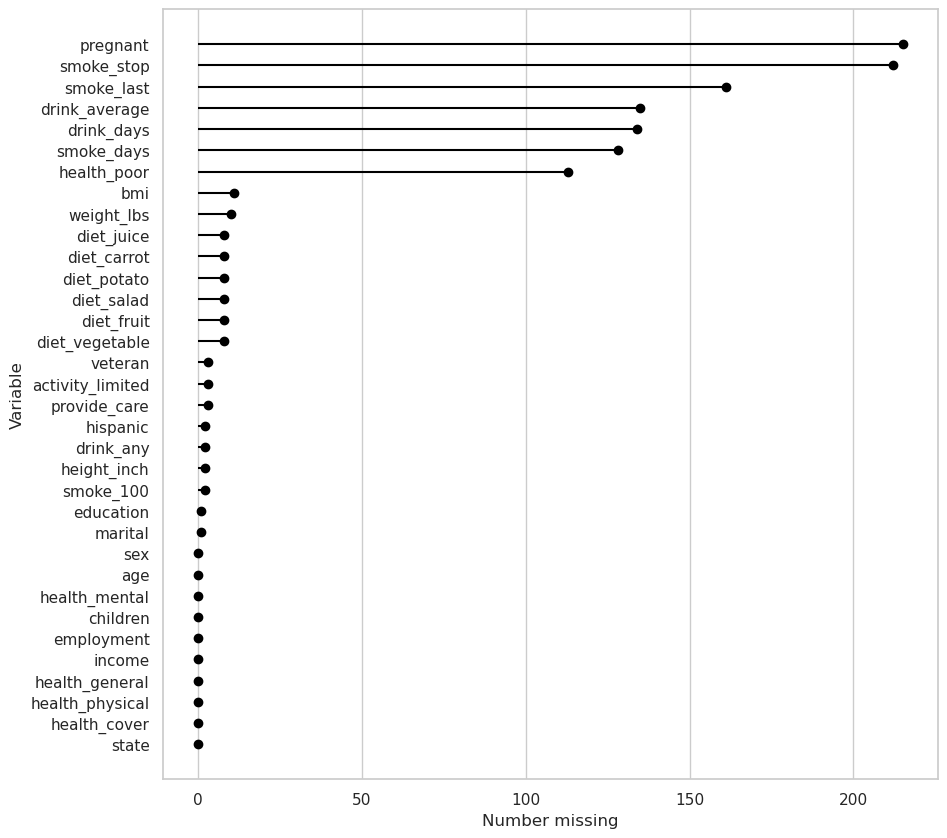

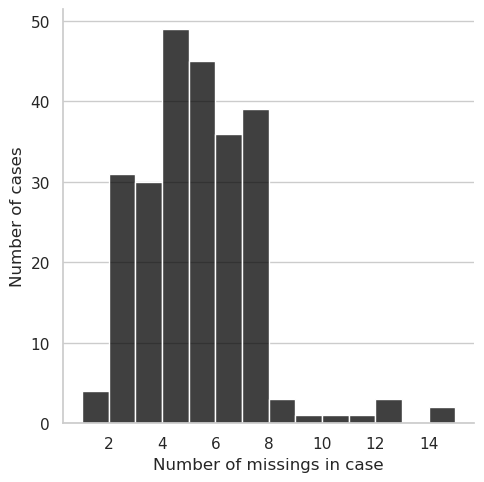

In [28]:
riskfactors_df.missing.missing_variable_plot()

### Casos / Observaciones / Filas

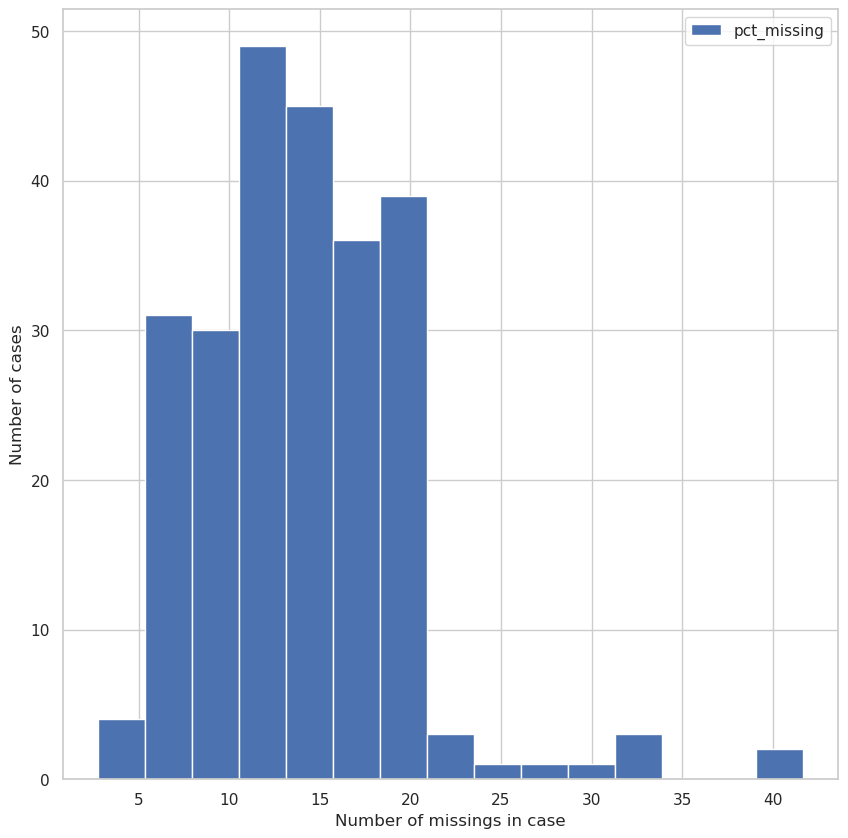

In [29]:
riskfactors_df.missing.missing_case_plot()

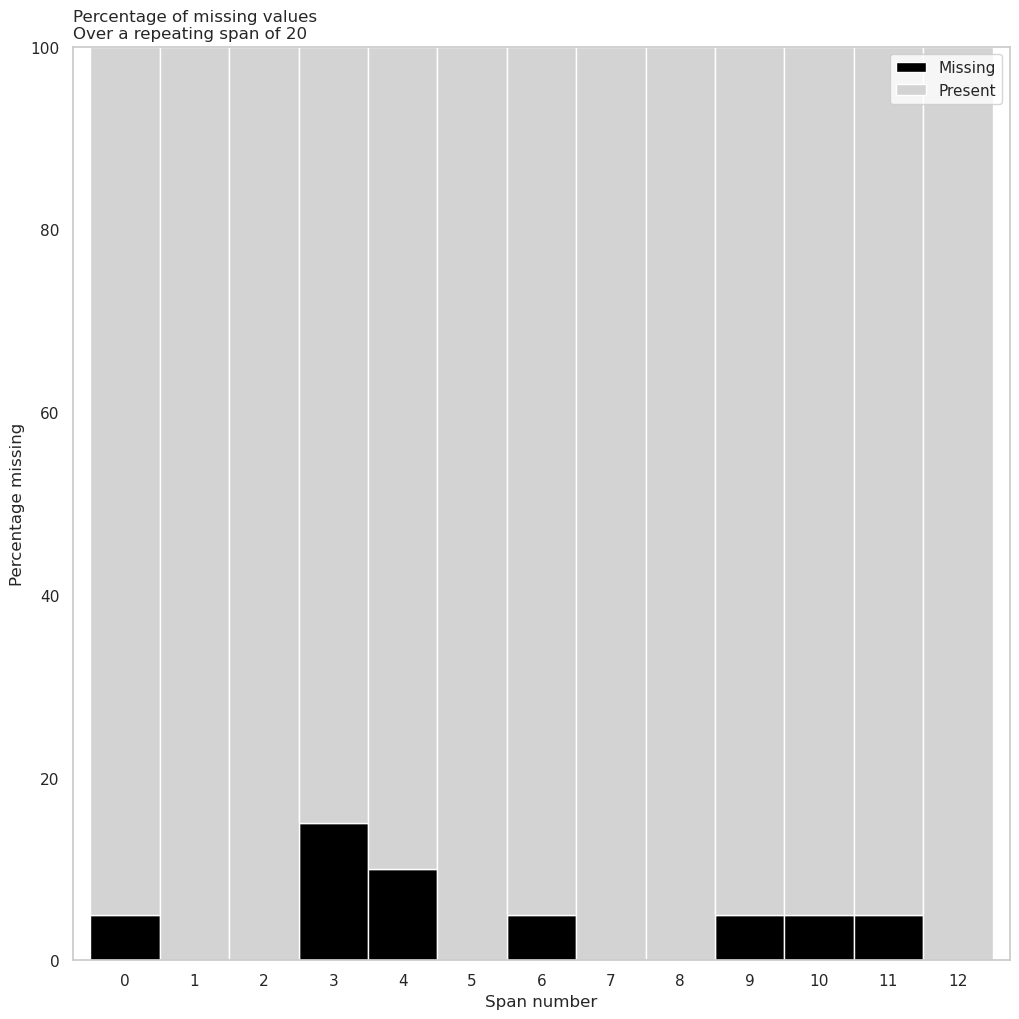

In [30]:
(riskfactors_df
 .missing
 .missing_variable_span_plot(
   variable='weight_lbs',
    span_every=20
    )
)

<AxesSubplot:>

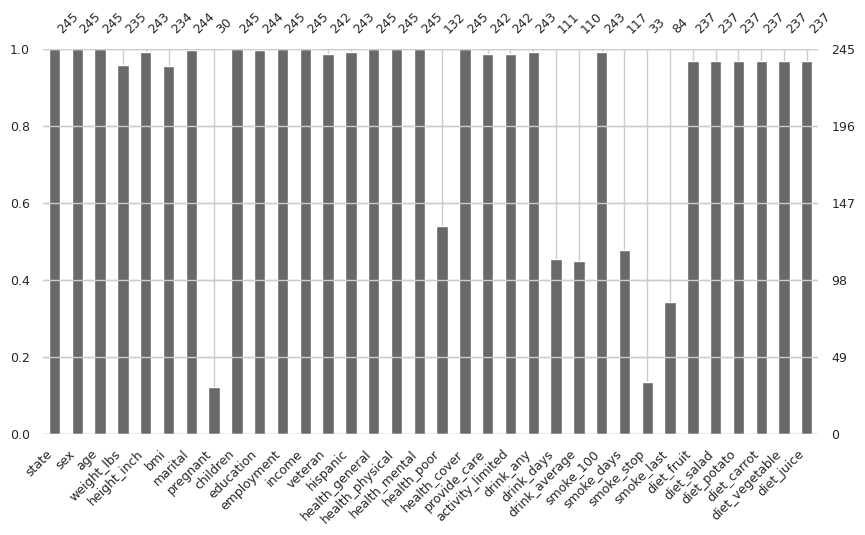

In [31]:
missingno.bar(riskfactors_df, figsize=(10, 5), fontsize=9)

<AxesSubplot:>

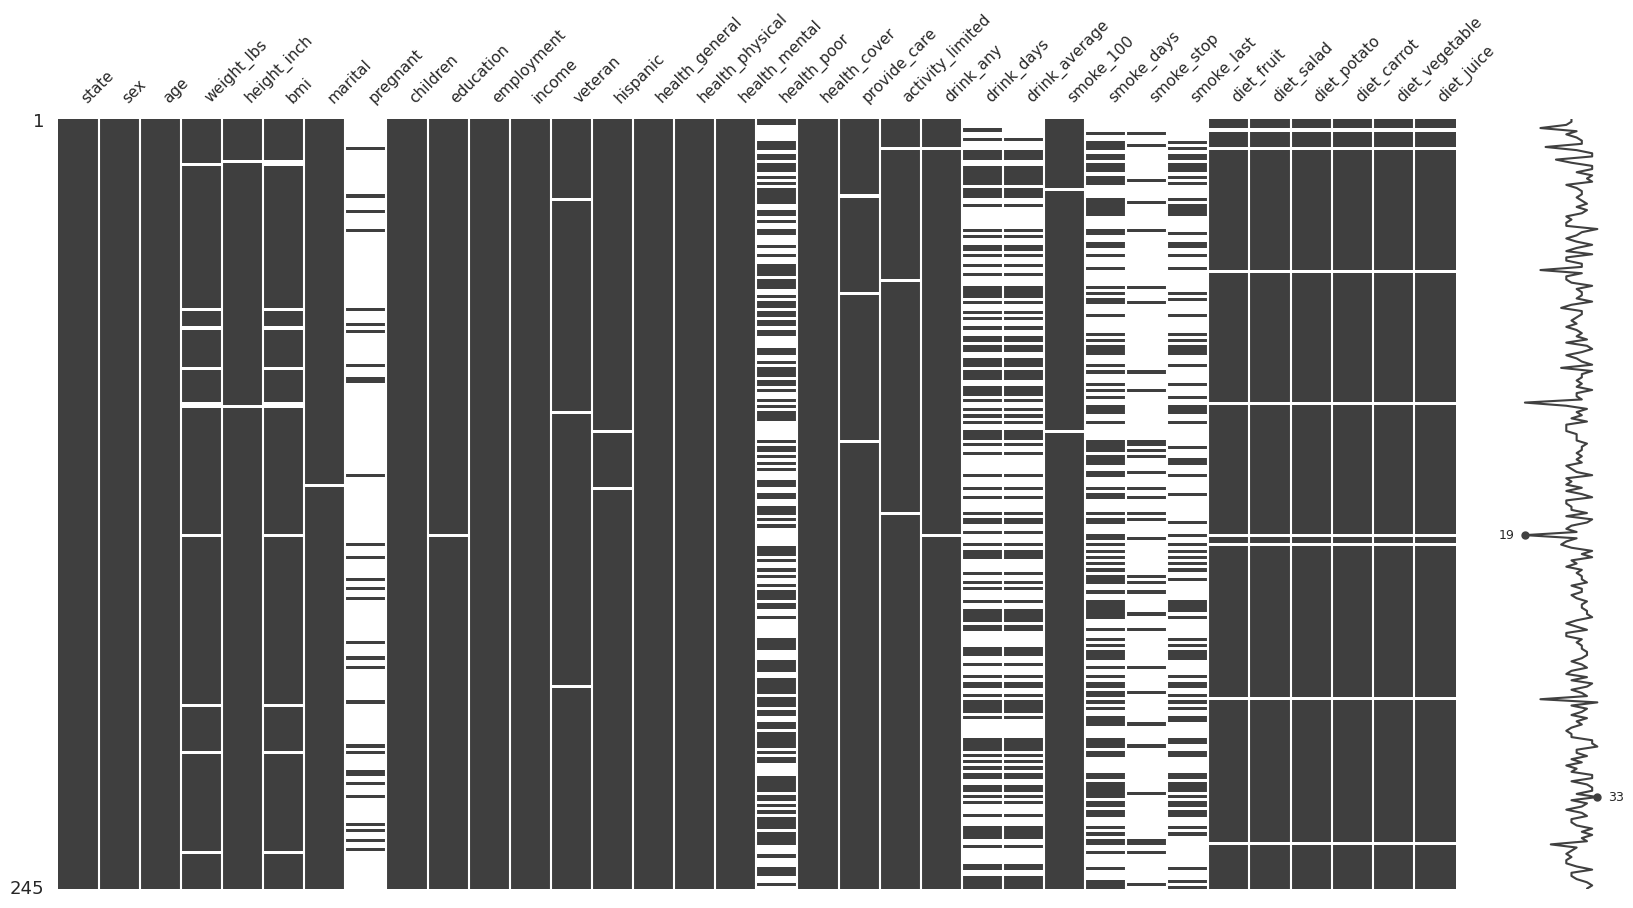

In [32]:
missingno.matrix(riskfactors_df, figsize=(20, 10), fontsize=11)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

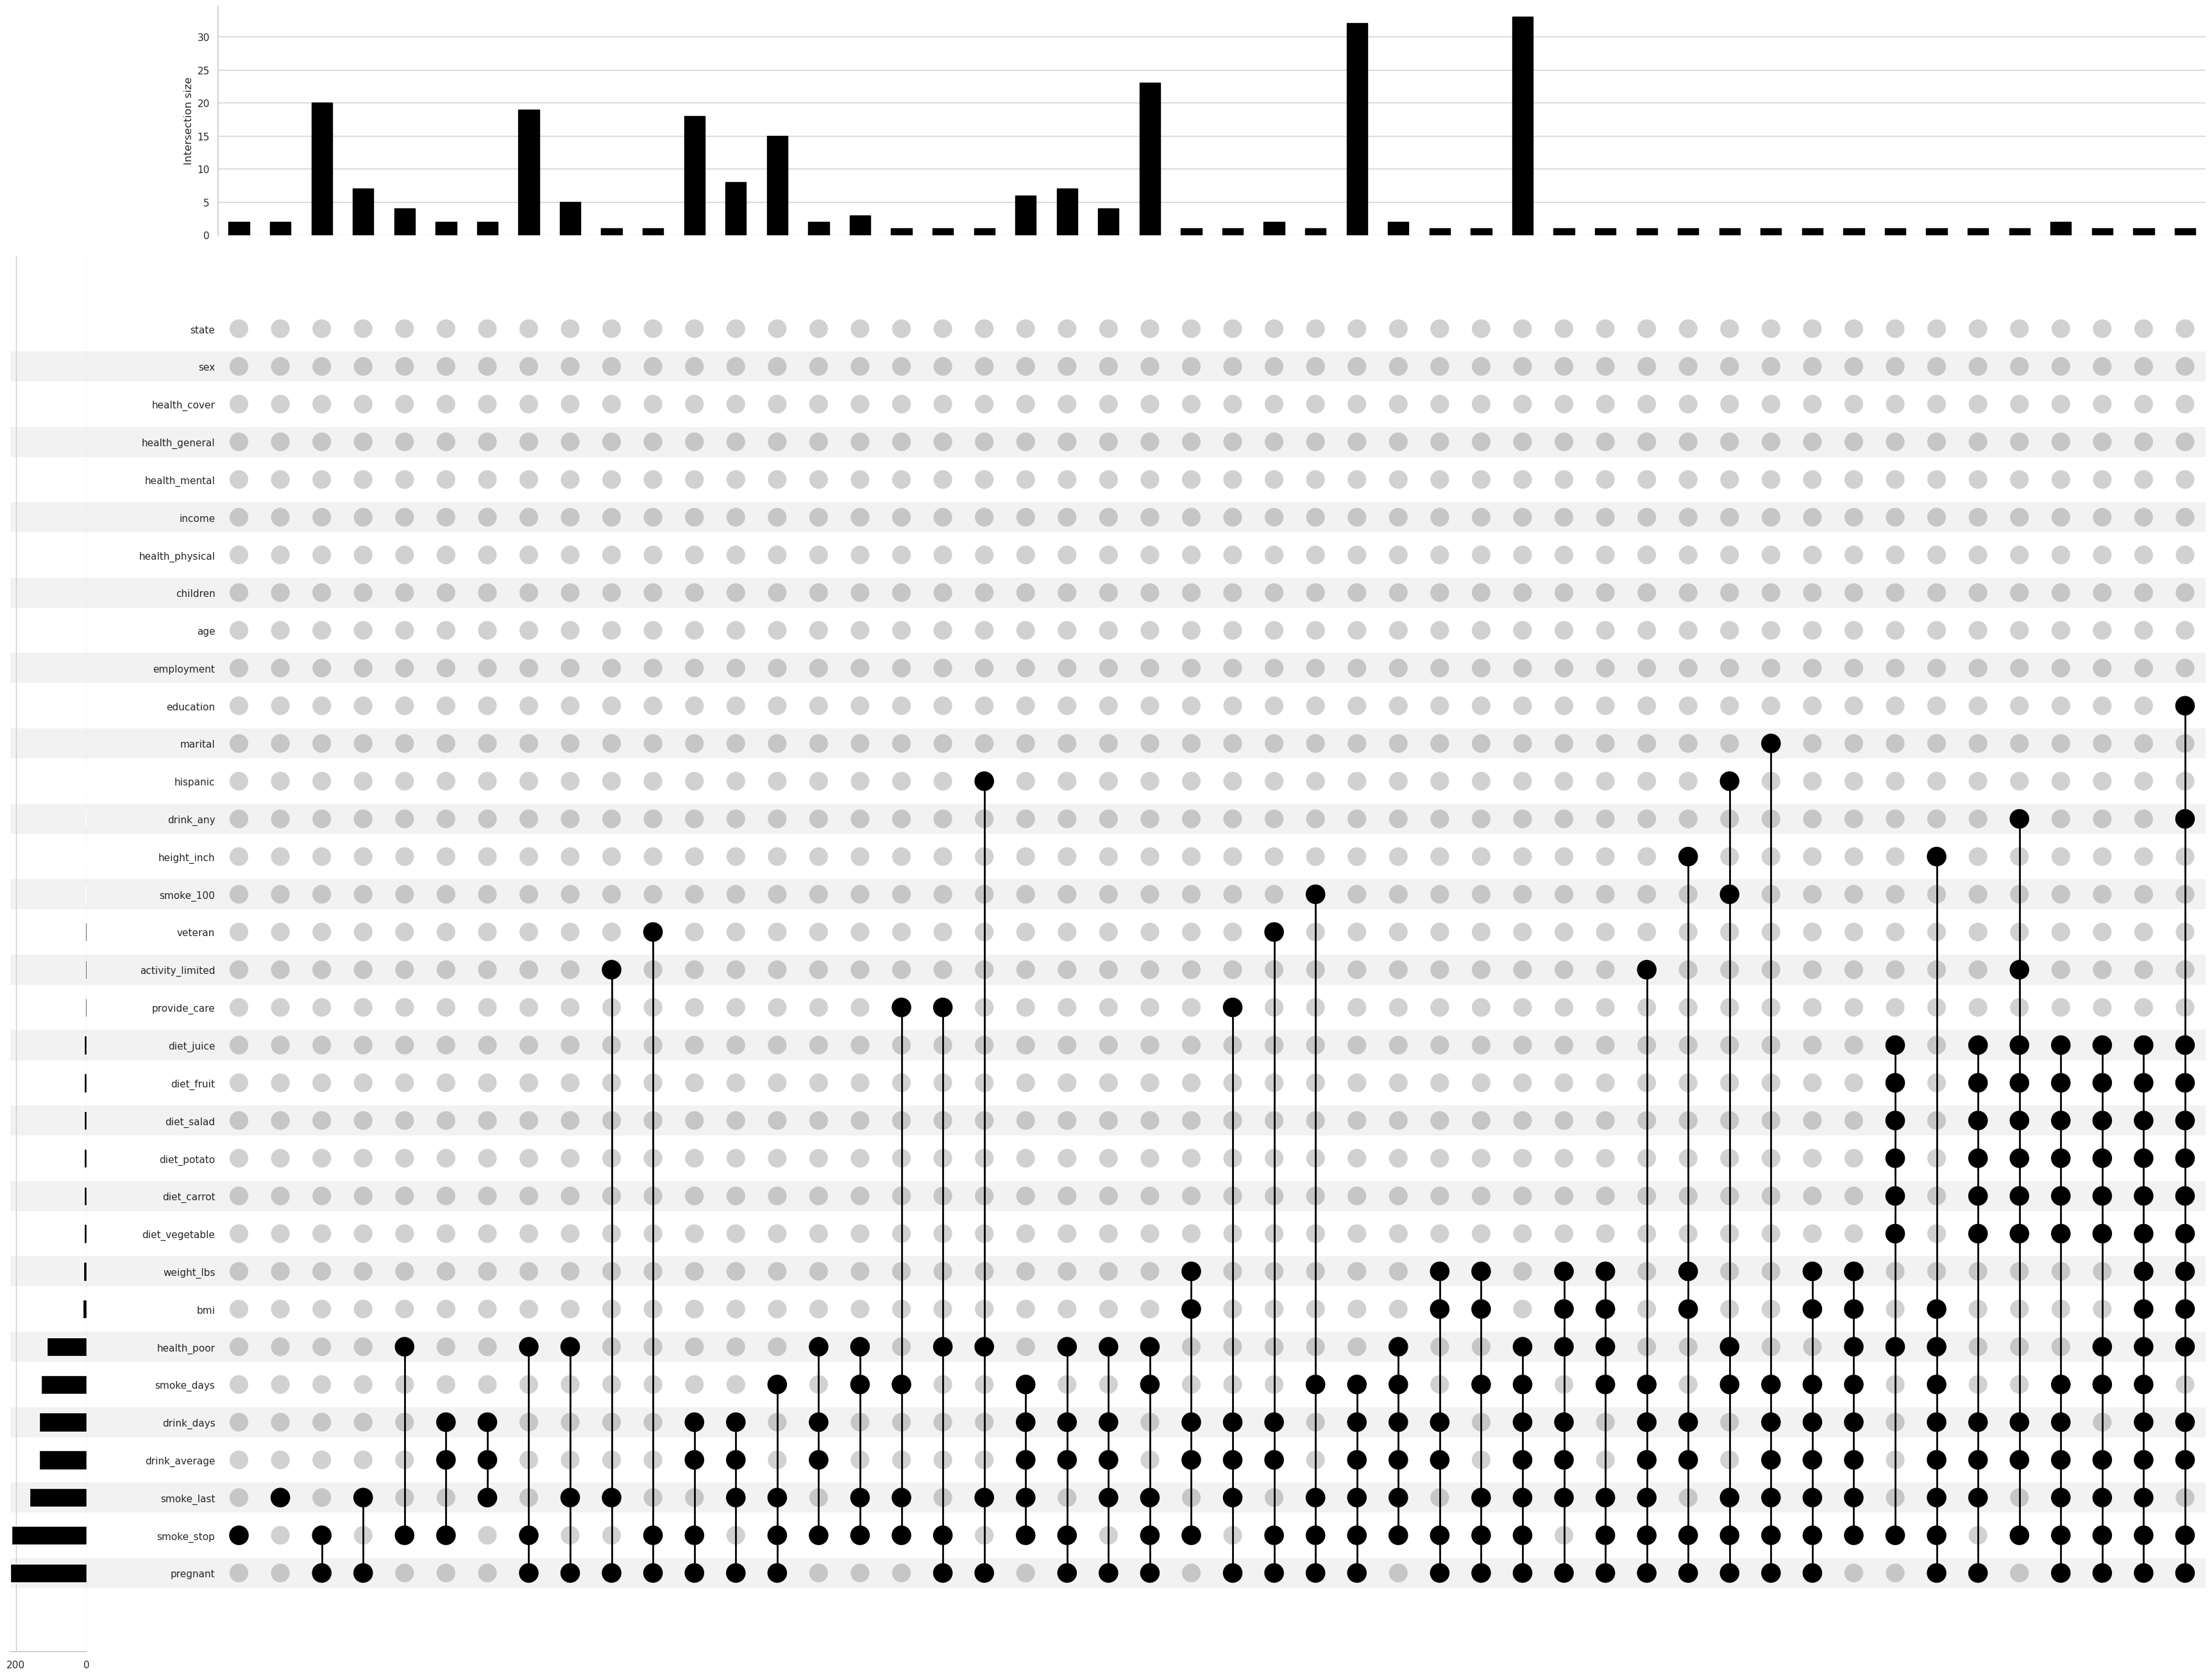

In [33]:
warnings.filterwarnings("ignore")
(riskfactors_df
    .missing
    .missing_upsetplot(
      variables=None,
      element_size=60
    )
)

_The UpSet plot visualizes the intersections of missing values across multiple variables (or columns), showing which combinations of them have concurrent absent data and their frequencies._

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

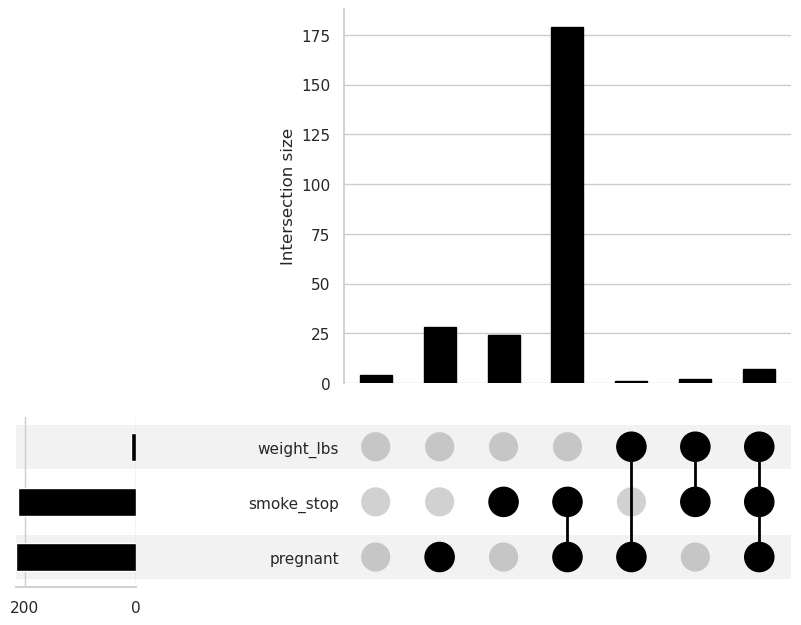

In [34]:
warnings.filterwarnings("ignore")
(riskfactors_df
    .missing
    .missing_upsetplot(
      variables=['weight_lbs', 'pregnant', 'smoke_stop'],
      element_size=60
    )
)

The UpSet plot reveals that in the given dataset, the most common missing data pattern occurs when **`smoke_stop` and `pregnant` are concurrently absent** in over 150 instances, while other combinations of `weight_lbs`, `smoke_stop`, and `pregnant` are less frequent.

## Codificación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    Al igual que cada persona es una nueva puerta a un mundo diferente, los <b>valores faltantes</b> existen en diferentes formas y colores. Al trabajar con valores faltantes será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

### Valores comúnmente asociados a valores faltantes

#### Cadenas de texto

In [35]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

#### Números

In [36]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

### ¿Cómo encontrar los valores comúnmente asociados a valores faltantes?

In [37]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [38]:
missing_data_example_df.missing.number_missing()

0

#### Revisar tipos de datos

In [39]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

#### Revisar valores únicos de los datos

In [40]:
missing_data_example_df.x.unique()

array([1, 3, 'NA', -99, -98], dtype=object)

In [41]:
(
  missing_data_example_df
  .select_dtypes(object)
  .apply(pd.unique)
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

### Sustituyendo valores comúnmente asociados a valores faltantes

#### Sustitución desde la lectura de datos

In [42]:
pd.read_csv(
    '../data/missing_data_enconding_example.csv',
    na_filter=True,
    na_values=[-99, -1]
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


#### Sustitución global

In [43]:
(
  missing_data_example_df
  .replace(
    to_replace=[-1, -98, -99, "NA", "N/A", "n/a", "na", "n a", "N A", "N /A", "N / A", "N / A ", "n /a", "n / a", " n / a", "n / a ", "", "*", ".", "?"],
    value=np.nan
  )
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,E,-101.0
4,NaN,F,NaN
5,NaN,G,NaN


#### Sustitución dirigida

### Conversión de valores faltantes implícitos a explícitos

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
        <i>
        "<b>Implícito</b> se refiere a todo aquello que se entiende que está incluido
        pero sin ser expresado de forma directa o explícitamente."
        </i>
    </p>
    <p>
    Un <code>valor faltante implícito</code> indica que el valor faltante <b>debería estar incluido</b>
    en el conjunto de datos del análisis, <b>sin que éste lo diga</b> o lo <b>especifique</b>.
    Por lo general, son valores que podemos encontrar al pivotar nuestros datos
    o contabilizar el número de apariciones de combinaciones de las variables de estudio.
    </p>
</div>

In [44]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


### Estrategias para la identificación de valores faltantes implícitos

#### Pivotar la tabla de datos

In [45]:
(
  implicit_to_explicit_df
  .pivot_wider(
    index='name',
    names_from='time',
    values_from='value'
  )
)

,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


#### Cuantificar ocurrencias de n-tuplas

In [46]:
(implicit_to_explicit_df
 .value_counts(
   subset=['name'],
    )
  .reset_index(name='n')
  .query('n < 3')
)

,name,n
1,zelda,1


### Exponer filas faltantes implícitas a explícitas

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
       <a href="https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.complete.complete", class="alert-link"><code>janitor.complete()</code></a> está modelada a partir de la función <a href="https://tidyr.tidyverse.org/reference/complete.html", class="alert-link"><code>complete()</code></a> del paquete <a href="https://tidyr.tidyverse.org/index.html", class="alert-link"><code>tidyr</code></a> y es un <i>wrapper</i> alrededor de <a href="https://pyjanitordevs.github.io/pyjanitor/api/functions/#janitor.functions.expand_grid.expand_grid", class="alert-link"><code>janitor.expand_grid()</code></a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.merge()</code></a> y <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.fillna()</code></a>. En cierto modo, es lo contrario de <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html", class="alert-link"><code>pd.dropna()</code></a>, ya que expone implícitamente las filas que faltan.
    </p>
    <p>
    Son posibles combinaciones de nombres de columnas o una lista/tupla de nombres de columnas, o incluso un  diccionario de nombres de columna y nuevos valores.
    </p>
    <p>
    Las columnas <a href="https://pandas.pydata.org/docs/user_guide/advanced.html"><code>MultiIndex</code></a> no son complatibles.
    </p>
</div>

#### Exponer n-tuplas de valores faltantes

Ejemplo, encontrar los pares faltantes de `name` y `time`.

In [47]:
print("\n--- Implicit to Explicit DataFrame ---")
print("This DataFrame has implicit missing values (NaN) in the 'value' column.")
print(implicit_to_explicit_df)

print("\n--- Pivoting with NaN values ---")
pivot_nan= (
  implicit_to_explicit_df
  .pivot_wider(
    index='name',          # Datos que se usarán como índice en el nuevo DataFrame
    names_from='time',     # Columnas del nuevo df
    values_from='value',   # Valores que se usarán para llenar las celdas
  )
)
print(pivot_nan)

print("\n--- Using complete to fill NaN values ---")
complete_nan = (
  implicit_to_explicit_df
  .complete(
    'name',
    'time'
  )
)
print(complete_nan)


--- Implicit to Explicit DataFrame ---
This DataFrame has implicit missing values (NaN) in the 'value' column.
    name       time  value
0   lynn    morning  350.0
1   lynn  afternoon  310.0
2   lynn      night    NaN
3  zelda    morning  320.0

--- Pivoting with NaN values ---
    name  afternoon  morning  night
0   lynn      310.0    350.0    NaN
1  zelda        NaN    320.0    NaN

--- Using complete to fill NaN values ---
    name       time  value
0   lynn  afternoon  310.0
1   lynn    morning  350.0
2   lynn      night    NaN
3  zelda  afternoon    NaN
4  zelda    morning  320.0
5  zelda      night    NaN


#### Limitar la exposición de n-tuplas de valores faltantes

In [48]:
(
  implicit_to_explicit_df
  .complete(
    {'name':['lynn', 'zelda']},
    {'time':['morning', 'afternoon']},
    sort=True   
  )
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,NaN
4,zelda,morning,320.0


#### Rellenar los valores faltantes

#### Limitar el rellenado de valores faltantes implícitos

## Tipos de valores faltantes

In [49]:
# diabetes_df.missing.missing_variable_plot()

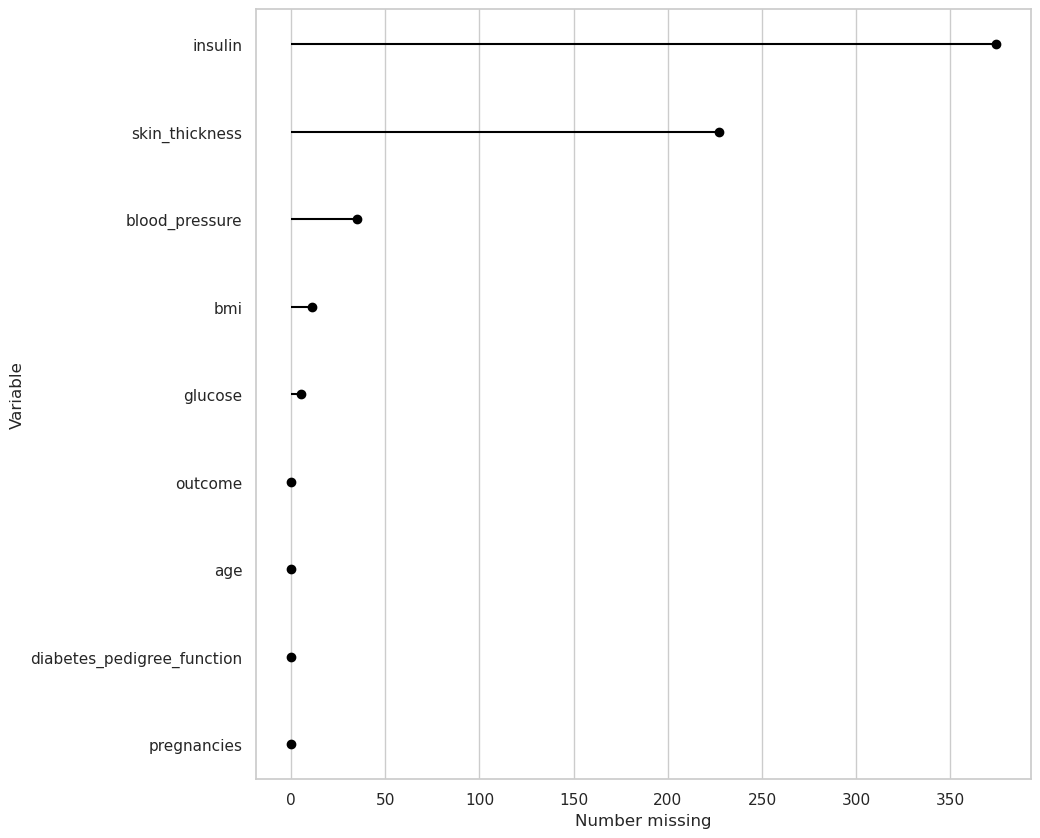

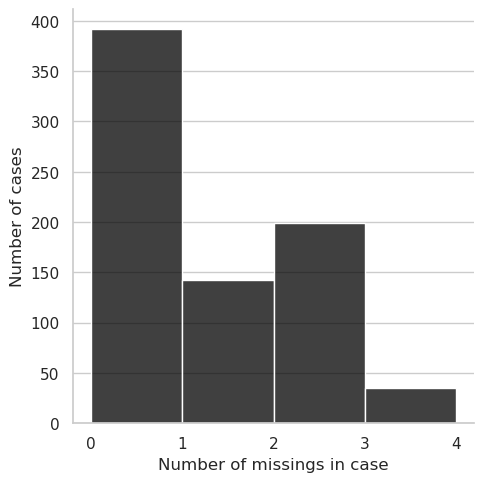

In [50]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)
diabetes_df.missing.missing_variable_plot()

### _Missing Completely At Random_ (MCAR)

<AxesSubplot:>

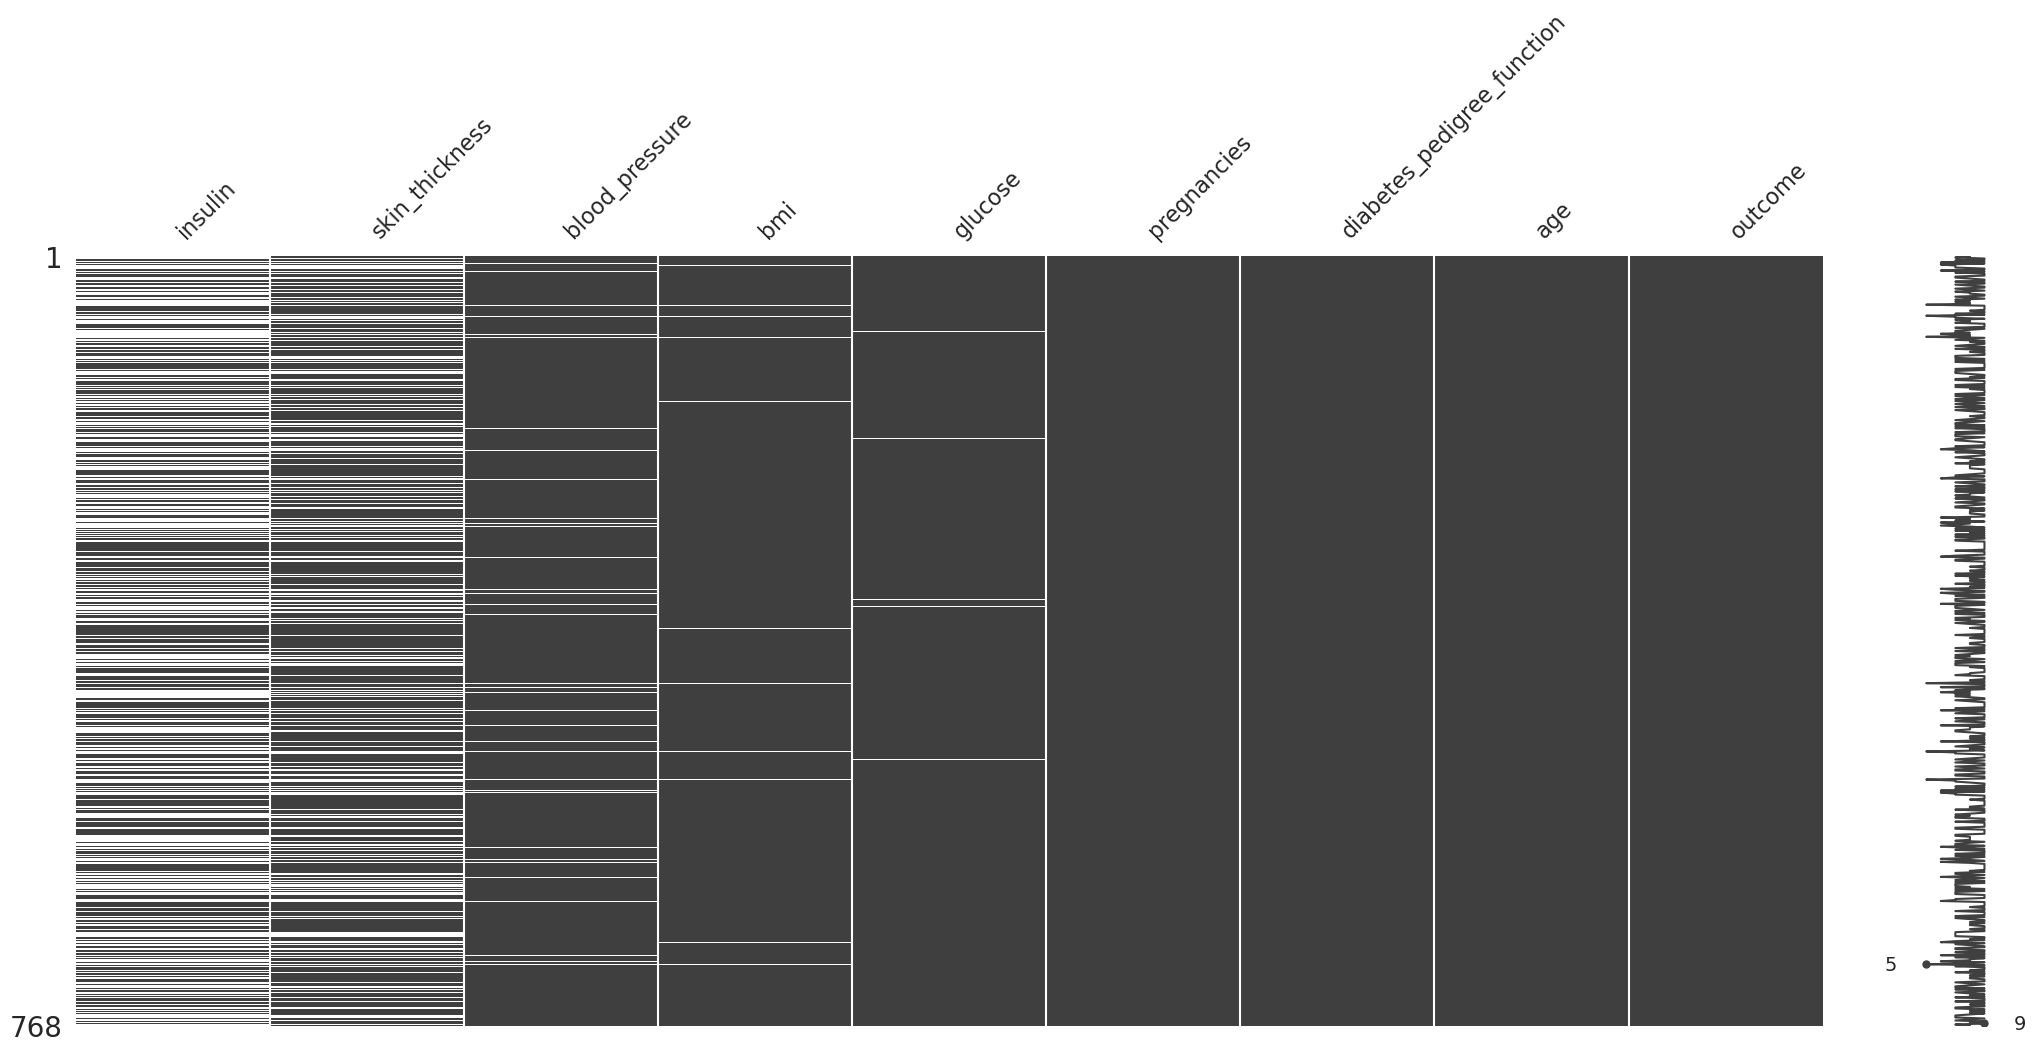

In [51]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

### _Missing At Random_ (MAR)

<AxesSubplot:>

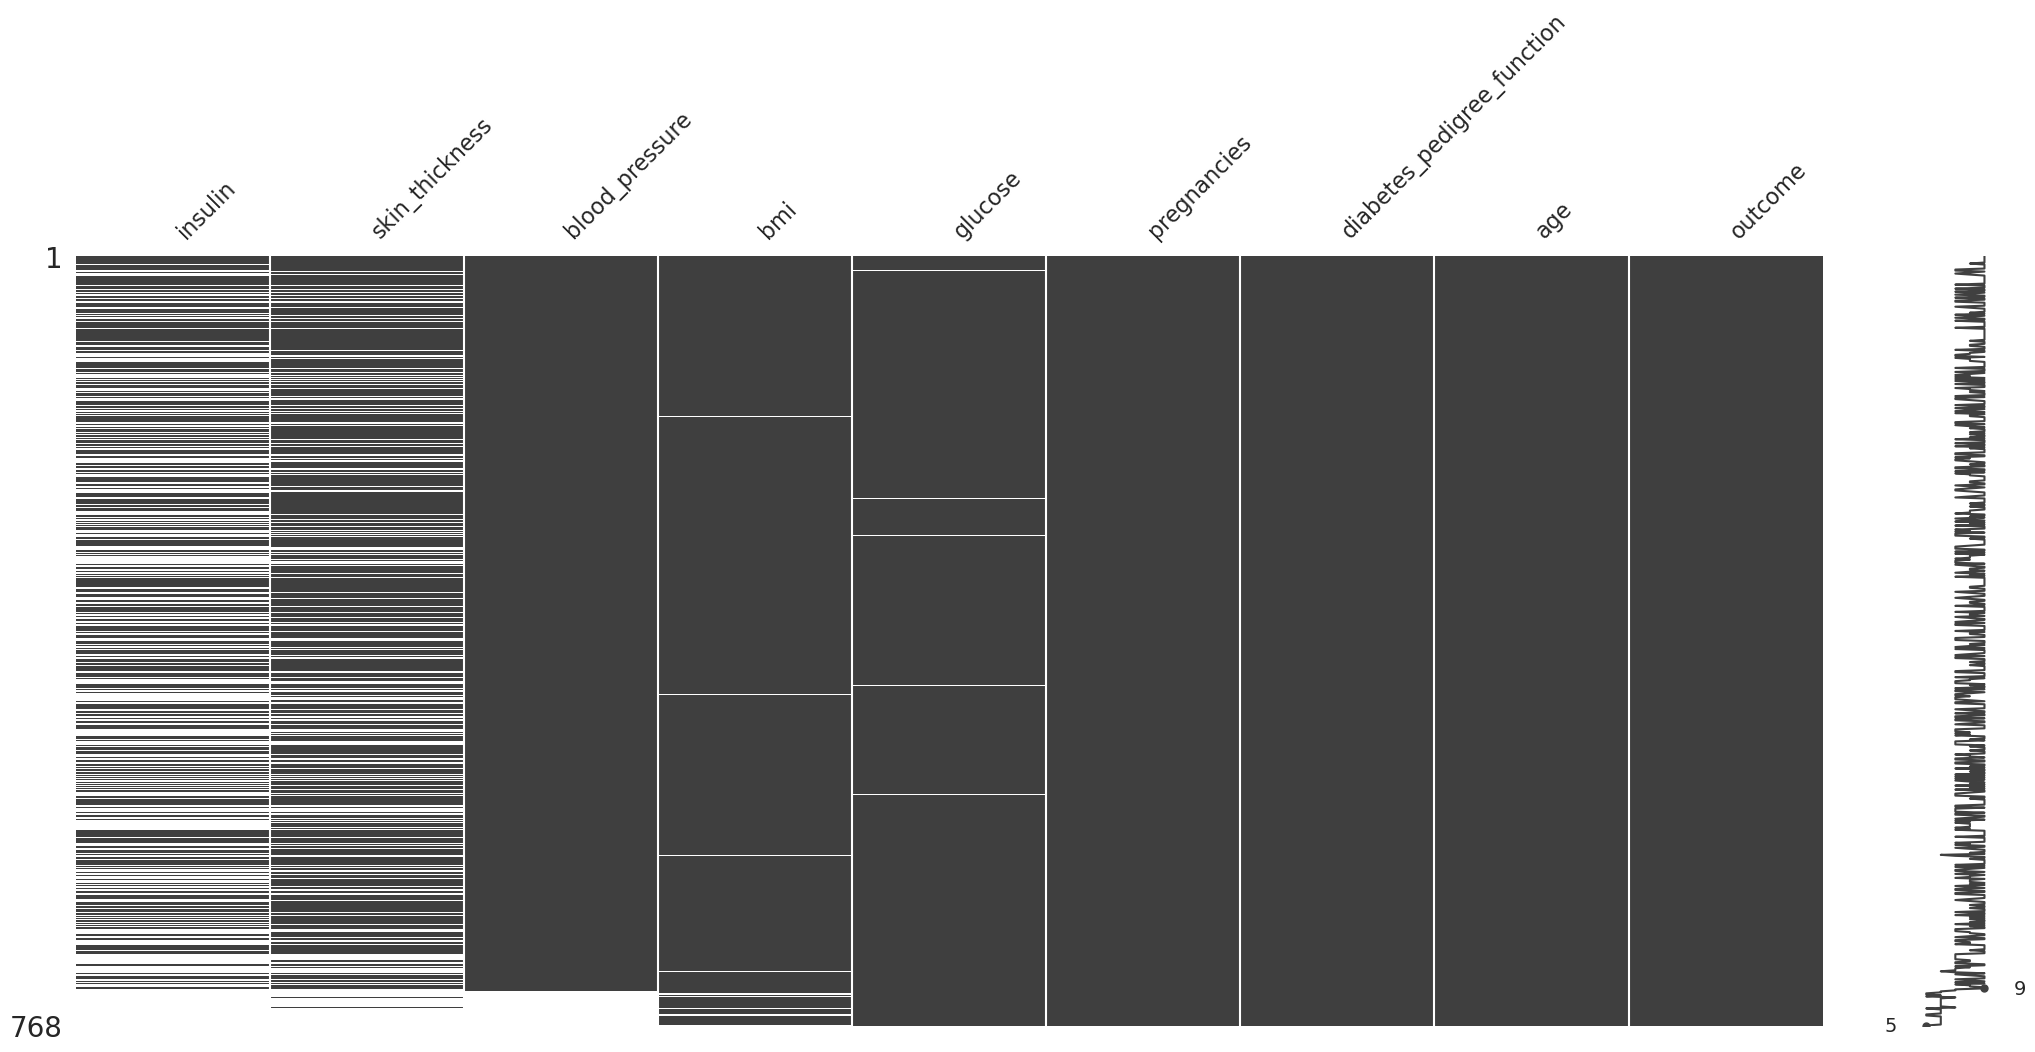

In [52]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by='blood_pressure')
    .pipe(missingno.matrix)
)

### _Missing Not At Random_ (MNAR)

<AxesSubplot:>

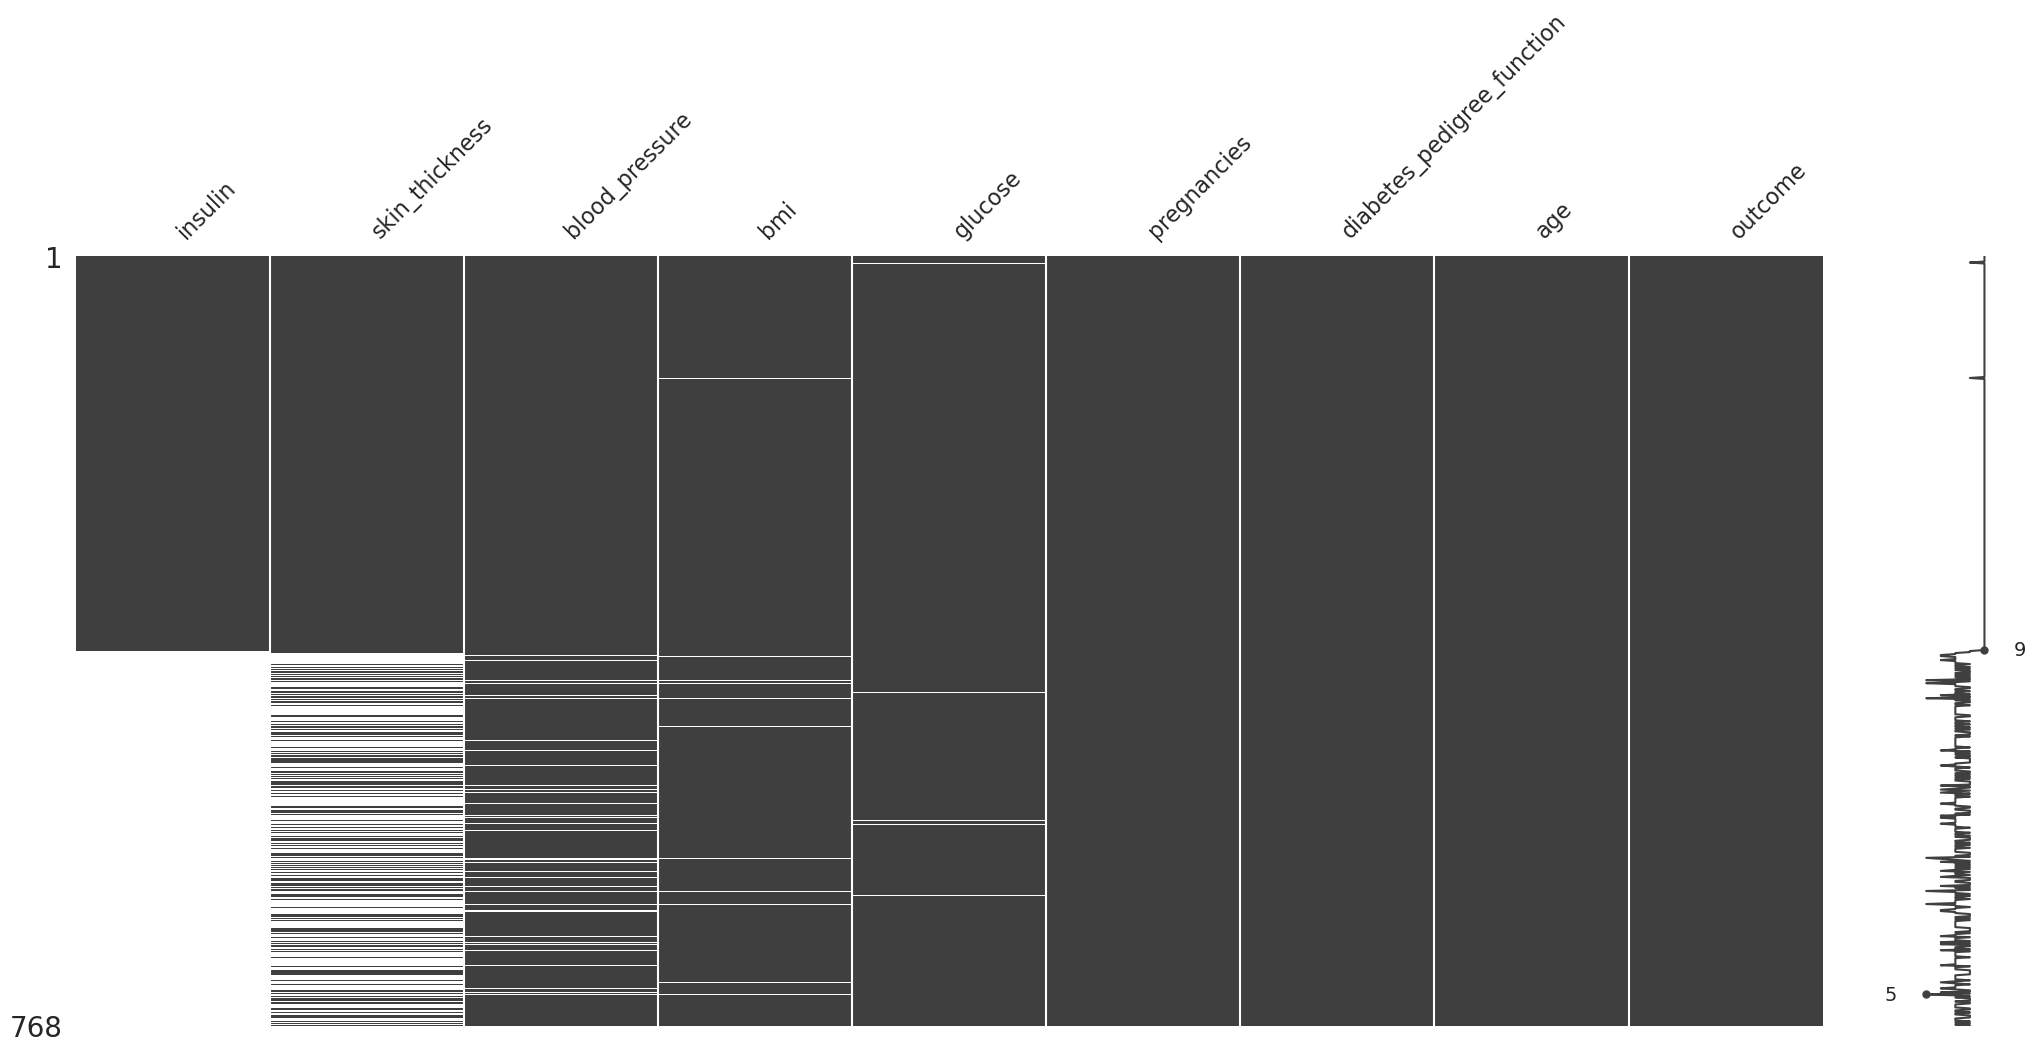

In [53]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by='insulin')
    .pipe(missingno.matrix)
)

Video a ver: [Mecanismos de datos faltantes de YouTube](https://www.youtube.com/watch?v=ARwHkq4t2q0)

## Concepto y aplicación de la matriz de sombras (_i.e._, _shadow matrix_)

 ### Construcción de la matriz de sombras

In [54]:
riskfactors_df

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,employment,income,veteran,hispanic,health_general,health_physical,health_mental,health_poor,health_cover,provide_care,activity_limited,drink_any,drink_days,drink_average,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,2,35-50k,5,No,Good,3,15,2,Yes,No,Yes,No,NaN,NaN,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,1,35-50k,5,No,Fair,4,30,3,Yes,No,No,No,NaN,NaN,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,5,<10k,5,Yes,Fair,0,0,NaN,Yes,No,No,No,NaN,NaN,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,1,>75k,5,No,Excellent,0,0,NaN,Yes,No,No,Yes,15,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,1,50-75k,5,No,Excellent,0,0,NaN,Yes,No,No,No,NaN,NaN,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,7,10-15k,2,No,Fair,5,1,0,Yes,Yes,No,No,NaN,NaN,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,1,15-20k,5,No,VeryGood,0,0,NaN,No,No,No,Yes,30,3,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,2,35-50k,5,No,Excellent,0,0,NaN,Yes,No,No,Yes,10,2,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138,64,23.74,Married,NaN,0,4,1,20-25k,5,No,Fair,2,5,0,No,Yes,No,Yes,1,1,Yes,Everyday,No,NaN,730,0,24,156,104,0


In [55]:
(
    riskfactors_df
    .isna()
    .replace({
        False: 'Not missing',
        True: 'Missing'
    })
    .add_suffix('_NA')
    .pipe(
        lambda shadow_matrix: pd.concat(
            [riskfactors_df, shadow_matrix],
            axis='columns'
        )
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,employment,income,veteran,hispanic,health_general,health_physical,health_mental,health_poor,health_cover,provide_care,activity_limited,drink_any,drink_days,drink_average,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice,state_NA,sex_NA,age_NA,weight_lbs_NA,height_inch_NA,bmi_NA,marital_NA,pregnant_NA,children_NA,education_NA,employment_NA,income_NA,veteran_NA,hispanic_NA,health_general_NA,health_physical_NA,health_mental_NA,health_poor_NA,health_cover_NA,provide_care_NA,activity_limited_NA,drink_any_NA,drink_days_NA,drink_average_NA,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,2,35-50k,5,No,Good,3,15,2,Yes,No,Yes,No,NaN,NaN,No,NaN,NaN,NaN,1095,261,104,156,521,12,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Missing,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,1,35-50k,5,No,Fair,4,30,3,Yes,No,No,No,NaN,NaN,No,NaN,NaN,NaN,52,209,52,0,52,0,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Missing,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,5,<10k,5,Yes,Fair,0,0,NaN,Yes,No,No,No,NaN,NaN,No,NaN,NaN,NaN,36,156,52,24,24,24,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Missing,Missing,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,1,>75k,5,No,Excellent,0,0,NaN,Yes,No,No,Yes,15,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,1,50-75k,5,No,Excellent,0,0,NaN,Yes,No,No,No,NaN,NaN,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Missing,Missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,7,10-15k,2,No,Fair,5,1,0,Yes,Yes,No,No,NaN,NaN,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missin

In [56]:
(
  riskfactors_df
  .missing
  .bind_shadow_matrix(only_missing = True)
  .groupby(["weight_lbs_NA"])["age"]
  .describe()
  .reset_index()
)

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


<AxesSubplot:xlabel='weight_lbs_NA', ylabel='age'>

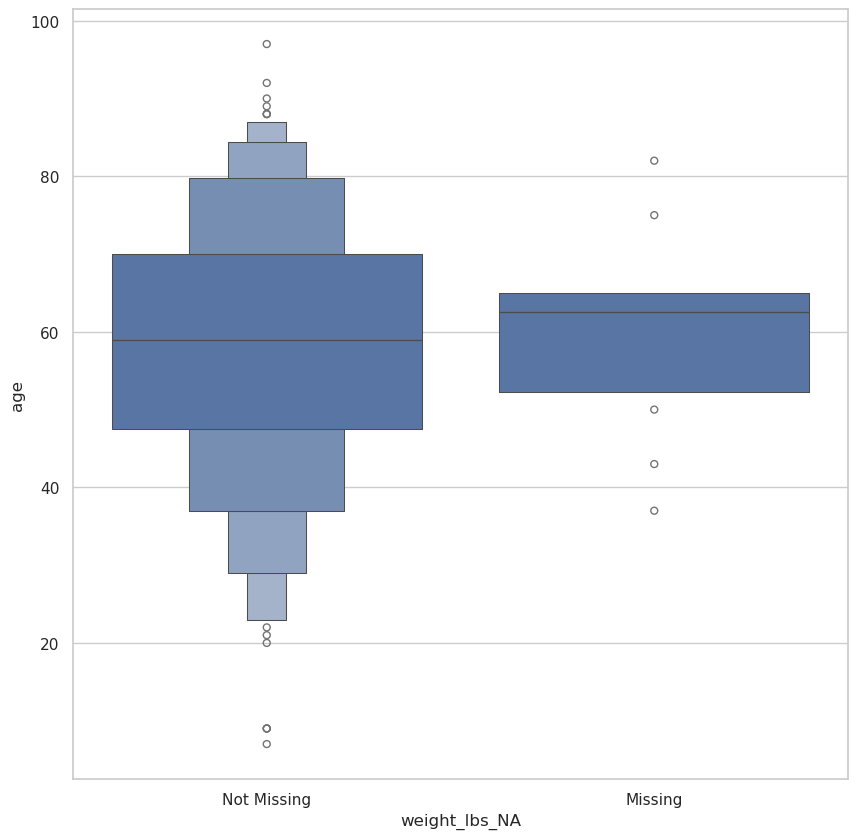

In [57]:
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
      lambda df : (
        sns.boxenplot(
          data = df,
          x = 'weight_lbs_NA',
          y = 'age'
        )
      )
    )
)

_Utilizar función de utilería 'bind_shadow_matrix()'_

In [58]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,employment,income,veteran,hispanic,health_general,health_physical,health_mental,health_poor,health_cover,provide_care,activity_limited,drink_any,drink_days,drink_average,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice,weight_lbs_NA,height_inch_NA,bmi_NA,marital_NA,pregnant_NA,education_NA,veteran_NA,hispanic_NA,health_poor_NA,provide_care_NA,activity_limited_NA,drink_any_NA,drink_days_NA,drink_average_NA,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,2,35-50k,5,No,Good,3,15,2,Yes,No,Yes,No,NaN,NaN,No,NaN,NaN,NaN,1095,261,104,156,521,12,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,1,35-50k,5,No,Fair,4,30,3,Yes,No,No,No,NaN,NaN,No,NaN,NaN,NaN,52,209,52,0,52,0,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,5,<10k,5,Yes,Fair,0,0,NaN,Yes,No,No,No,NaN,NaN,No,NaN,NaN,NaN,36,156,52,24,24,24,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,1,>75k,5,No,Excellent,0,0,NaN,Yes,No,No,Yes,15,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,1,50-75k,5,No,Excellent,0,0,NaN,Yes,No,No,No,NaN,NaN,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,7,10-15k,2,No,Fair,5,1,0,Yes,Yes,No,No,NaN,NaN,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,1,15-20k,5,No,VeryGood,0,0,NaN,No,No,No,Yes,30,3,No,NaN,NaN,NaN,52,52,52,24,52,24,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,2,35-50k,5,No,Excellent,0,0,NaN,Yes,No,No,Yes,10,2,Yes,Not@All,NaN,7,365,156,104,52,730,365,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not

_Exploracion estadísticos usando nuevas columnas de matriz de sombras_

In [59]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,employment,income,veteran,hispanic,health_general,health_physical,health_mental,health_poor,health_cover,provide_care,activity_limited,drink_any,drink_days,drink_average,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice,weight_lbs_NA,height_inch_NA,bmi_NA,marital_NA,pregnant_NA,education_NA,veteran_NA,hispanic_NA,health_poor_NA,provide_care_NA,activity_limited_NA,drink_any_NA,drink_days_NA,drink_average_NA,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,2,35-50k,5,No,Good,3,15,2,Yes,No,Yes,No,NaN,NaN,No,NaN,NaN,NaN,1095,261,104,156,521,12,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,1,35-50k,5,No,Fair,4,30,3,Yes,No,No,No,NaN,NaN,No,NaN,NaN,NaN,52,209,52,0,52,0,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,5,<10k,5,Yes,Fair,0,0,NaN,Yes,No,No,No,NaN,NaN,No,NaN,NaN,NaN,36,156,52,24,24,24,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,1,>75k,5,No,Excellent,0,0,NaN,Yes,No,No,Yes,15,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,1,50-75k,5,No,Excellent,0,0,NaN,Yes,No,No,No,NaN,NaN,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,7,10-15k,2,No,Fair,5,1,0,Yes,Yes,No,No,NaN,NaN,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,1,15-20k,5,No,VeryGood,0,0,NaN,No,No,No,Yes,30,3,No,NaN,NaN,NaN,52,52,52,24,52,24,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,2,35-50k,5,No,Excellent,0,0,NaN,Yes,No,No,Yes,10,2,Yes,Not@All,NaN,7,365,156,104,52,730,365,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not

_Visualización de valores faltantes en una variable_

<AxesSubplot:xlabel='weight_lbs_NA', ylabel='age'>

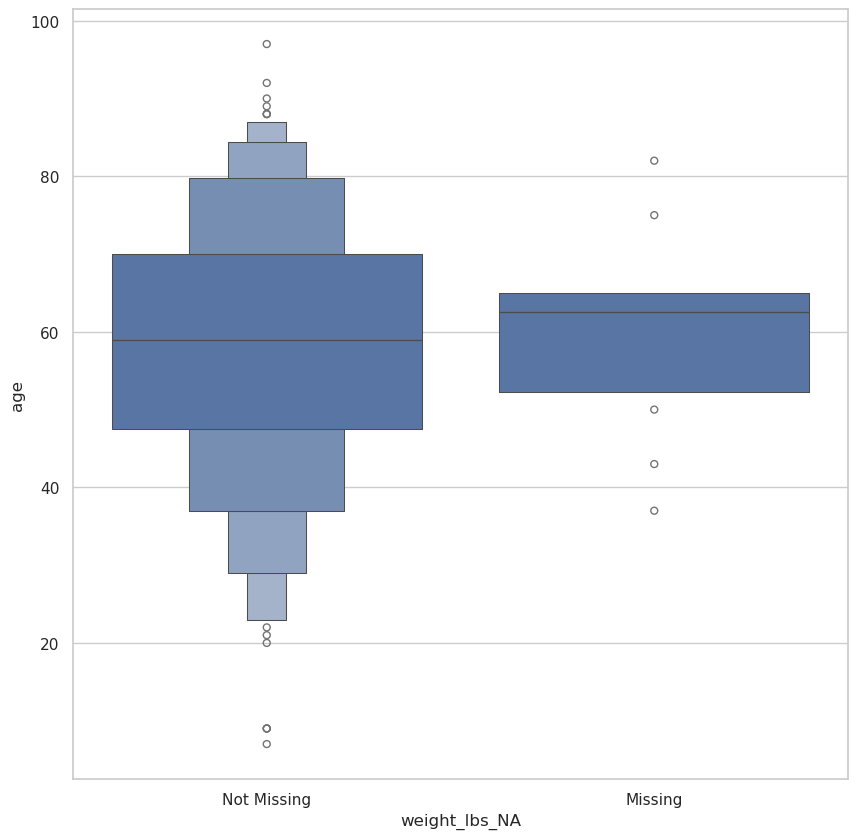

In [60]:
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df : (
            sns.boxenplot(
                data=df,
                x='weight_lbs_NA',
                y='age'
            )
        )
    )
)

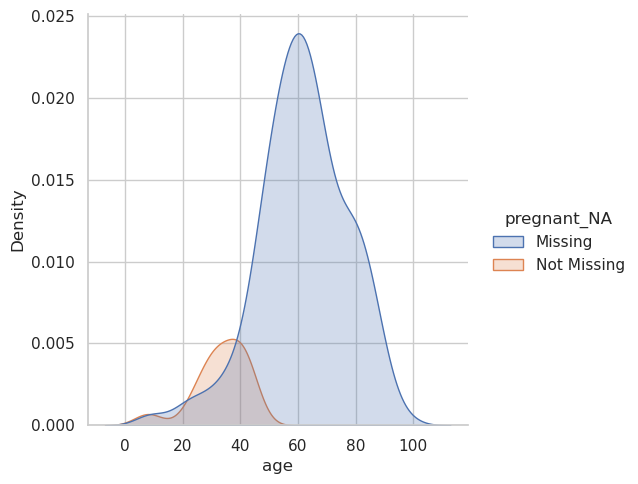

In [61]:
(    
	riskfactors_df    
	.missing    
	.bind_shadow_matrix(only_missing=True)    
	.pipe(        
		lambda df:(           
			sns.displot(                
				data = df,                
				x = 'age',                
				kind = 'kde',                
				hue = 'pregnant_NA',  
				fill = True
			)            
		)    
	)
)

_Shadow matrix_

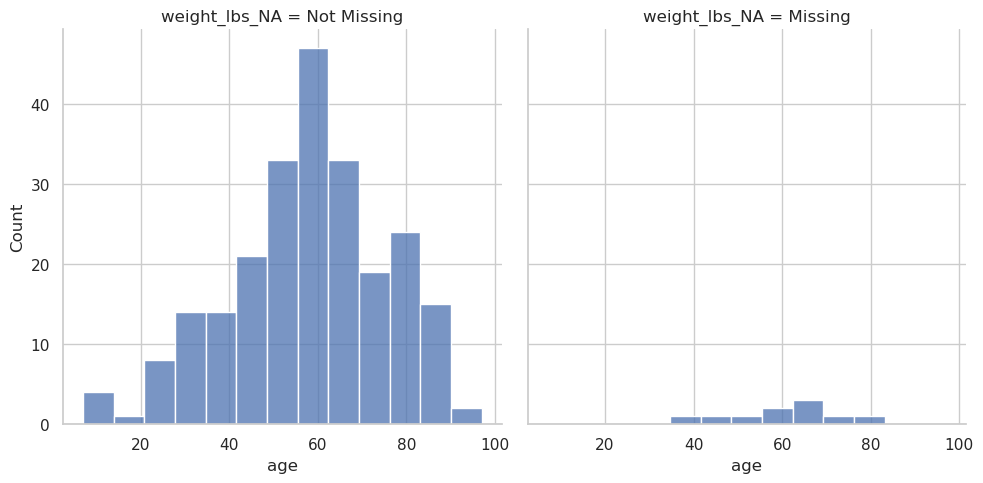

In [62]:
(    
	riskfactors_df    
	.missing    
	.bind_shadow_matrix(only_missing=True)    
	.pipe(        
		lambda df:(           
			sns.displot(                
				data = df,                
				x = 'age',                
				col = 'weight_lbs_NA'
			)            
		)    
	)
)

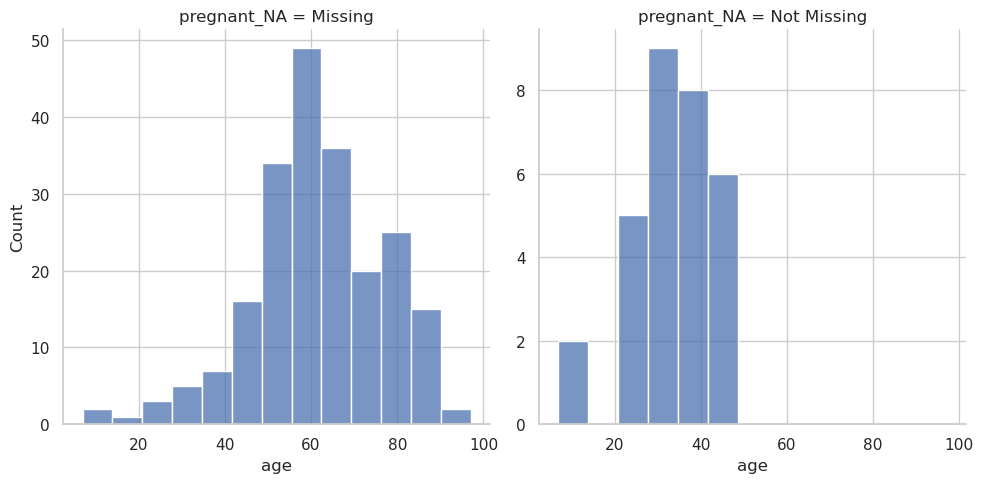

In [63]:
(    
	riskfactors_df    
	.missing    
	.bind_shadow_matrix(only_missing=True)    
	.pipe(        
		lambda df:(           
			sns.displot(                
				data = df,                
				x = 'age',                
				col = 'pregnant_NA',
                facet_kws={
                    'sharey': False
                }
			)
		)
	)
)

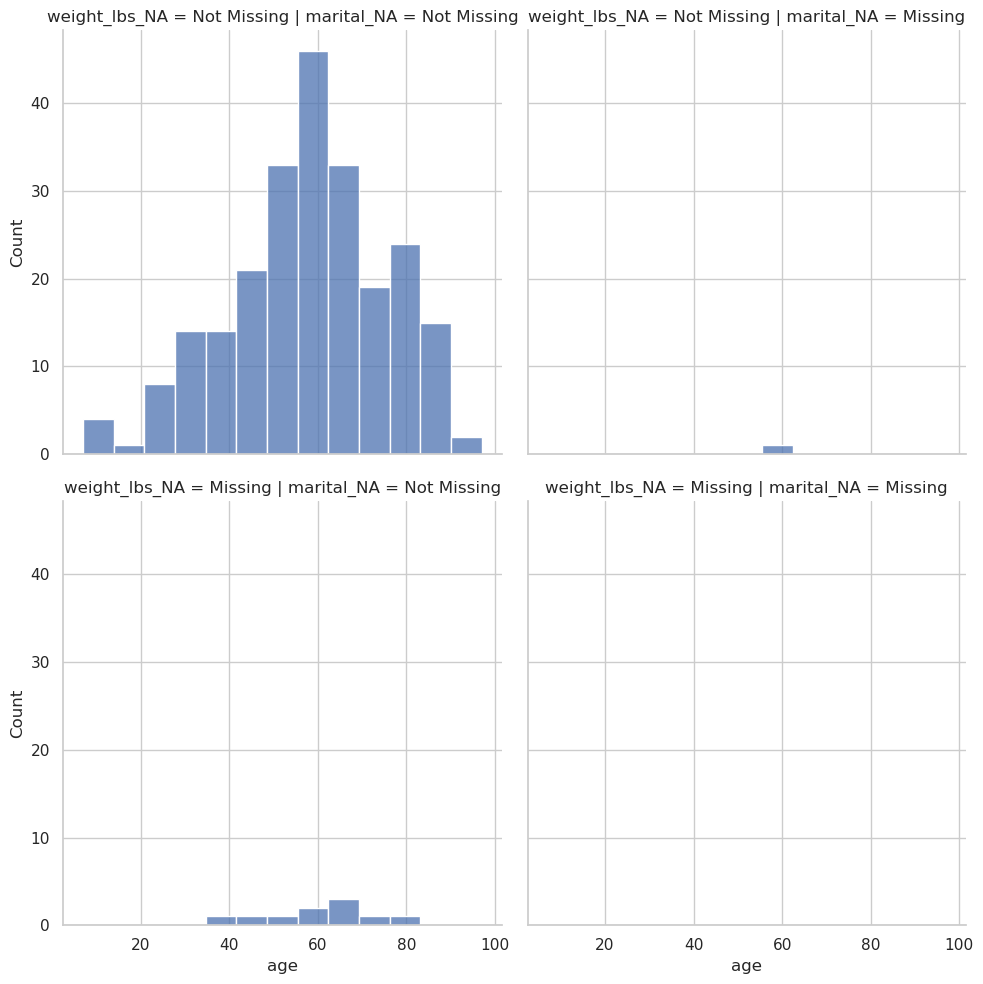

In [64]:
# ─────────────────────────────────────────────────────────────────────────────
# ¿Qué hace este bloque?
# Cuenta, para cada combinación 2×2 de “Missing/Not Missing” en weight_lbs (filas)
# y marital (columnas), cuántos registros de age hay:
#   - n_age_present  → age no es NaN (los que realmente “aparecen” en el histograma)
#   - n_age_missing  → age es NaN
#   - n_rows         → total de filas en la celda (presentes + ausentes)

(    
	riskfactors_df    
	.missing    
	.bind_shadow_matrix(only_missing=True)    
	.pipe(        
		lambda df:(           
			sns.displot(                
				data = df,                
				x = 'age',                
                col = 'marital_NA',
                row = 'weight_lbs_NA'
			)
		)
	)
)

## Visualización de valores faltantes en dos variables

In [65]:
def column_fill_with_dummies(
    column: pd.Series,
    proportion_below: float = 0.10,  # % del mínimo real para desplazar el piso de dummies
    jitter: float = 0.075,            # fracción del rango para dispersar los dummies
    seed: int = 42                    # semilla para reproducibilidad del ruido
) -> pd.Series:
    """
    Reemplaza los NaN de una serie por puntos 'dummy' numéricos justo por debajo
    del mínimo real, con un pequeño jitter para evitar solapamientos en la gráfica.

    Args:
        column (pd.Series): Serie original con posibles NaN.
        proportion_below (float): Fracción del mínimo real para calcular el piso.
        jitter (float): Fracción del rango para crear dispersión aleatoria.
        seed (int): Semilla para el generador de números aleatorios.

    Returns:
        pd.Series: Nueva serie con los NaN sustituidos por dummies numéricos.
    """

    # 1) Crear copia profunda para no alterar la serie original
    column = column.copy(deep=True)

    # 2) Identificar posiciones con NaN
    missing_mask = column.isna()           # Serie booleana: True donde había NaN
    number_missing_values = missing_mask.sum()  # Cantidad total de NaN

    # 3) Calcular rango auténtico de la serie (max – min)
    real_min = column.min()                # Mínimo real (sin NaN)
    real_max = column.max()                # Máximo real
    column_range = real_max - real_min     # Diferencia para escalar el jitter

    # 4) Definir 'piso' de dummies: un poco por debajo del mínimo real
    #    Ejemplo: con proportion_below=0.10, shift = real_min – 10%·real_min
    column_shift = real_min - (real_min * proportion_below)

    # 5) Generar ruido (jitter) para cada dummy
    #    - np.random.seed fija la semilla para reproducibilidad
    #    - np.random.rand(n) crea n valores en [0,1)
    #    - restar 2 pasa esos valores a [-2, -1) ⇒ desplazamiento negativo garantizado
    #    - multiplicar por column_range * jitter ajusta la magnitud del ruido
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    # 6) Asignar a cada posición NaN un valor dummy = piso + su jitter correspondiente
    column[missing_mask] = column_shift + column_jitter

    # 7) Devolver la serie modificada (mismos índices, dummies en reemplazo de NaN)
    return column


In [66]:
riskfactors_df.missing.column_fill_with_dummies("age")

0      49
1      48
2      55
3      42
4      66
       ..
240    79
241    45
242    62
243    62
244     9
Name: age, Length: 245, dtype: int32

Grafica del scatterplot para datos faltantes

<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

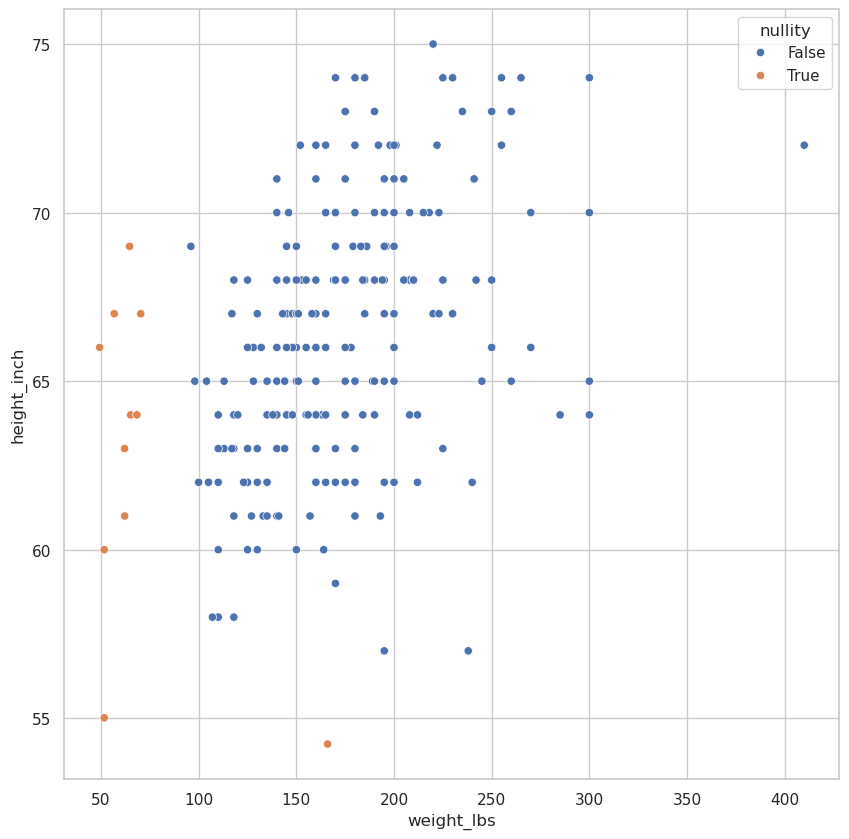

In [67]:
(
    riskfactors_df
    # Selección de variables numéricas, excluyendo las categóricas
    .select_dtypes(
        exclude='category'
    )
    # .pipe() aplica la función lambda: filtra solo las columnas que tienen al menos un NaN
    .pipe(
        lambda df: df[df.columns[df.isna().any()]]
    )
    # Se construye la matriz de sombras (_NA) únicamente para estas columnas
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    # .apply() recorre cada columna: 
    #   - Si es una columna _NA, se conserva igual 
    #   - Si no, se aplica column_fill_with_dummies() para reemplazar los NaN por dummies
    .apply(
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, proportion_below=0.01, jitter=0.075)
    )
    .assign(
        nullity = lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df:(
            sns.scatterplot(
                data = df,
                x = 'weight_lbs',
                y = 'height_inch',
                hue = 'nullity'

            )
        )
    )
)


_Gráfica de dos variables a extensión de pandas missing extension_

<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

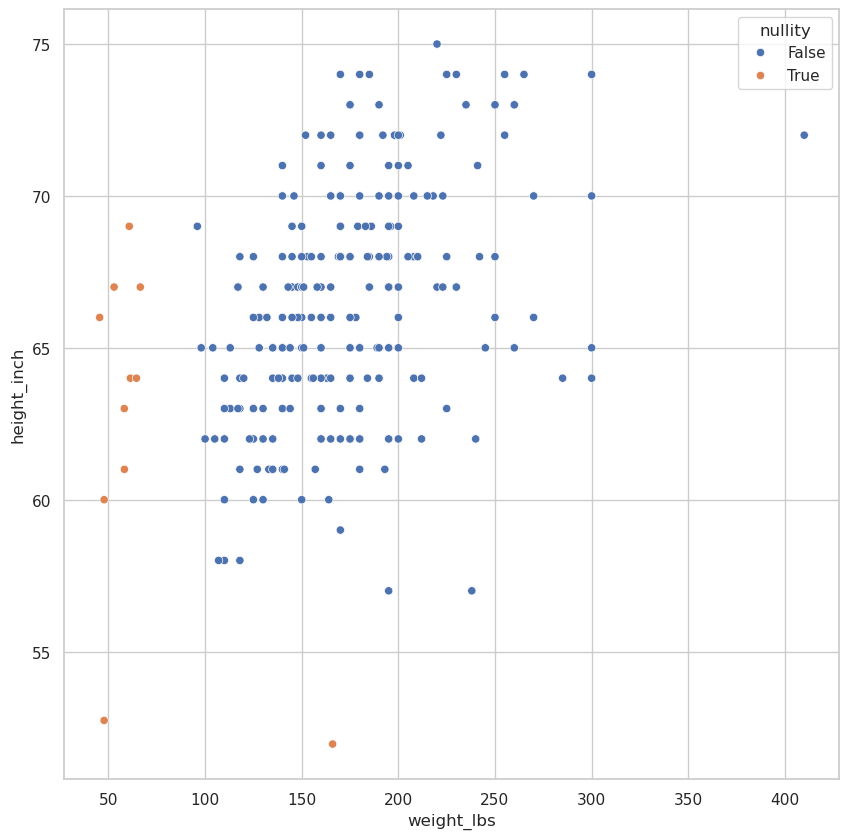

In [68]:
(
    riskfactors_df.missing.missing_scatterplot_with_dummies(x="weight_lbs", y="height_inch")
)

## Correlación de nulidad

## Eliminación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    La eliminación de valores faltantes <b>asume</b> que los valores faltantes están perdidos
    completamente al azar (<code>MCAR</code>). En cualquier otro caso, realizar una
    eliminación de valores faltantes podrá ocasionar <b>sesgos</b> en los
    análisis y modelos subsecuentes.
    </p>
</div>

Primero observa el número total de observaciones y variables que tiene tu conjunto de datos.

### _Pairwise deletion_ (eliminación por pares)

### _Listwise Deletion or Complete Case_ (Eliminación por lista o caso completo)

#### Con base en 1 columna

#### Con base en 2 o más columnas

### Representación gráfica tras la eliminación de los valores faltantes

## Imputación básica de valores faltantes

### Imputación con base en el contexto

In [ ]:
implicit_to_explicit_df = pd.DataFrame(
    data={
        "name": ["lynn", np.nan, "zelda", np.nan, "shadowsong", np.nan],
        "time": ["morning", "afternoon", "morning", "afternoon", "morning", "afternoon",],
        "value": [350, 310, 320, 350, 310, 320]
    }
)

implicit_to_explicit_df

### Imputación de un único valor

## Continúa aprendiendo sobre el manejo de valores faltantes

<div class="alert alert-success">
    <b style="font-size: 1.5em;">✅ ¡Felicidades por terminar el curso!</b>
    <p>
Has aprendido bastante sobre la exploración y manipulación de valores faltantes.
    </p>
    <p>
Empezaste conociento las principales operaciones al trabajar con valores faltantes. Ahora, eres consciente de que estas operaciones no son universales y cada software decide tratar a los valores faltantes a su conveniencia.
    </p>
    <p>
Y, hablando de conveniencias, comenzaste tu camino en la exploración de valores faltantes a través de una representación universal de qué es lo que faltaba. No obstante, no pasó mucho para darte cuenta de que los valores faltantes pueden existir en formas muy variables. Incluso, en formas en las que no sabemos que nos faltan estos valores en sí mismos. 
    </p>
    <p>
Con los valores faltantes ya expuestos, te conviertes en una persona capaz de explorarlos en profundidad de forma estadística y visual. Entendiendo así, los distintos mecanismos que pueden tener los valores faltantes: MCAR, MAR y MNAR.
    </p>
    <p>
A su vez, aprendiste las bases sobre cómo tratarlos a través de la eliminación de elementos o la imputación de valores de una forma básica y sencilla. Por lo tanto, necesitarás continuar tu camino de aprendizaje con un curso que te permita profundizar en estas técnicas de tratamiento para valores faltantes.
    </p>
    <p>
Te recomiendo continuar con mi <a href="https://platzi.com/cursos/datos-faltantes-imputacion/">Curso de Manejo de Datos Faltantes: Imputación</a>. Estoy seguro de que tus habilidades adquiridas hasta el momento mejorarán, permitiéndote realizar análisis cada vez más complejos y cercanos al mundo real.
    </p>
    <p>
    Con mucha alegría por tu logro,
   Jesús Vélez Santiago
    </p>
    
</div>

## Información de sesión

In [ ]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=694a3d08-7f18-421d-9e2f-c2820a79680e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>